<table>
    <tr><td><b>Names</b></td><td>Fill in your names here</td></tr>
    <tr><td><b>Group</b></td><td>Report your group number here</td></tr>
</table>

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import operator
import pylab

pylab.rcParams['figure.figsize'] = (10.0, 8.0)


# Principal Component Analysis

In this lab, we will project data on the "principal components" of the data. This is the last lab of the course, and it is pretty short and simple, but hopefully it will give you some insights into PCA.

So, first, let's load the data.

[[-5.62069061 -8.16158858 -4.40882883 ... -2.27152341 -7.95215384
  -3.26323601]
 [ 8.79115958  3.32673978  6.46257729 ...  7.36375932  3.64900919
   9.02339609]]


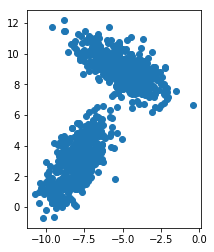

In [11]:

data = np.load("data-2class.npz")
d = data['d'].T
d = d-np.array([8,-3])[:,np.newaxis]
l = data['l'].ravel()

colours = [ [ 'b', 'r' ][int(x)] for x in np.nditer(l)]

# Code for plotting the heat map
import time
from IPython import display
plt.axes(aspect='equal')
plt.scatter(d[0,:],d[1,:])

print(d)

# Principal Component Analysis (PCA)

We have two-dimensional data, so doing a PCA on this data will result in two principal components. Let's compute those: 
1. Compute the covariance matrix of the dataset
1. Decompose this matrix into eigenvalues and eigenvectors (using ```np.linalg.eig```). Check out the python help for that function, ```help(np.linalg.eig)```, and notice that the eigenvalues are not necessarily ordered.
1. Project the data on both eigenvectors. This gives you a (non-normalised) distance along the vector. Multiplying that scalar with the eigenvector results in a reprojection of the data into the original space. For both projections, Multiply the projection with the projection vectors. Plot a scatterplot of the data and the reprojections on both individual vectors.
1. Compute the Euclidean distance between the original data and the reprojections. **Question 1 [5 marks]: Which eigenvector (corresponding to which eigenvalue) results in the largest reconstruction error? Explain why that is.**
1. Reconstruct the original data by combining (adding) both projections. Verify that this results in a vanishing error.



[ 1.50728559 12.68379227]
[[-0.89702431 -0.4419812 ]
 [ 0.4419812  -0.89702431]]


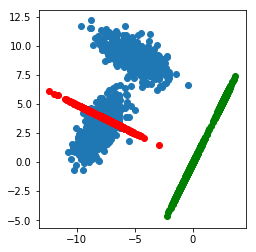

[[-5.62069061  8.79115958]
 [-8.16158858  3.32673978]
 [-4.40882883  6.46257729]
 ...
 [-2.27152341  7.36375932]
 [-7.95215384  3.64900919]
 [-3.26323601  9.02339609]]
Mean error on each projection : [3.6446326823665567, 8.488086809687026]
The error committed by the projection on the eigen vector relative to the largest eigen value 
      is larger than the error on the other eigen vector because the data has a high bias toward the direction 
      orthogonal to the eigen vector corresponding to the largest eigen value.
      We should take that bias into account to get lower error.
The total error on the reconstruction is : 1.1814324283368324e-12


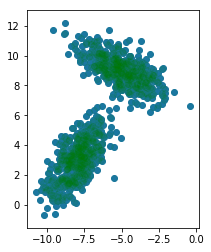

In [39]:
cov = np.cov(d)
w, u = np.linalg.eig(cov)

print(w, u, sep='\n')
plt.axes(aspect='equal')
plt.scatter(d[0,:],d[1,:])
colors = ['r', 'g']

d_proj = []
error_proj= []
for i in range(2):
    u_vec = u[:,i]
    d_proj += [np.array([np.array(x.dot(u_vec)*u_vec) for x in d.T])]
    plt.scatter(d_proj[i][:,0], d_proj[i][:,1], c=colors[i])
    
    error = np.sum([np.sqrt(np.array(s-t).dot(s-t)) for s,t in zip(d.T, d_proj[i])])/len(d.T)
    error_proj += [error]

plt.show()
reconstruction = np.sum(d_proj, axis=0)
print(reconstruction)

plt.axes(aspect='equal')
plt.scatter(reconstruction[:,0], reconstruction[:,1])
plt.scatter(d[0,:],d[1,:], c='g', alpha=0.1)
error_reconstruction = np.sum([np.sqrt(np.array(s-t).dot(s-t)) for s,t in zip(reconstruction, d.T)])

print('Mean error on each projection : {}'.format(error_proj))

print("""The error committed by the projection on the eigen vector relative to the largest eigen value 
      is larger than the error on the other eigen vector because the data has a high bias toward the direction 
      orthogonal to the eigen vector corresponding to the largest eigen value.
      We should take that bias into account to get lower error.""")

print('The total error on the reconstruction is : {}'.format(error_reconstruction))

In [1]:
#ANSQ1

#/ANSQ1

# Plotting the projected data

In the following figure, we plot:
1. a scatterplot of the data projected on the first principal component vs the data projected on the second principal component. In other words, for each datapoint d: x = projection1(d), y = projection2(d)
2. The data projected on the first principal component (eigenvector with largest corresponding eigenvalue). That is, x=projection1(d), y=0
1. The data projected on the second principal component (eigenvector with second-largest, i.e., smallest, eigenvalue): y=projection2(d), x=-10 (say)

That is, by using all projection vectors, we completely reconstruct the data's structure, but we align it to the new coordinate system. The dataset is rotated in this new space, but the distances between the points are preserved.

[[ 8.92742342 -5.40164427]
 [ 8.79149983  0.62310228]
 [ 6.81116434 -3.84846947]
 ...
 [ 5.29225493 -5.60150048]
 [ 8.7460688   0.24145257]
 [ 6.9153735  -6.65191668]]
[ 8.48808681 -2.53297958]


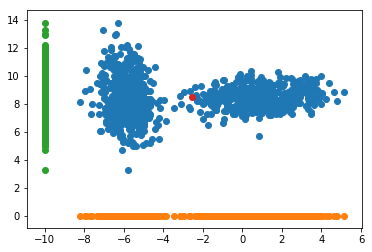

In [55]:
w, v = np.linalg.eig(np.cov(d))

plt.scatter(d.T.dot(v[:,1]),d.T.dot(v[:,0]))
plt.scatter(d.T.dot(v[:,1]),np.zeros(d.shape[1]))
plt.scatter(np.zeros(d.shape[1])-10, d.T.dot(v[:,0]))

d_acp = np.array(list(zip(d.T.dot(v[:,0]),d.T.dot(v[:,1]))))
d_acp_mean = np.mean(d_acp, axis=0)

print(d_acp)
print(d_acp_mean)
plt.scatter(d_acp_mean[1], d_acp_mean[0])

**Question 2 [5 marks]** 

Subtract the sample mean from the data, and redo the projections and reconstruction error computation as above. Is there a difference in reconstruction error with what we had before? 

Using the projection of the original data, and the projection of the mean-subtracted data on the first eigenvector (the eigenvector with largest eigenvalue), can you find a threshold (different for these two projections) that would classify the data well? You do not need to learn it automatically, just look at the data plot and try to find such a threshold manually. Does subtracting the mean improve the classification results? Discuss this.

[[ 0.43933661 -2.86866469]
 [ 0.30341302  3.15608186]
 [-1.67692247 -1.31548989]
 ...
 [-3.19583188 -3.0685209 ]
 [ 0.25798199  2.77443215]
 [-1.57271331 -4.1189371 ]]
[112.56601832235724, 38.80435933843632]
The total error when projecting on each eigen vector after removing the bias is: [112.56601832235724, 38.80435933843632]
We can see that the second eigen vector (which has the largest eigen value) has now a lower error.
It's because we have remove the bias in the data when shifting it.


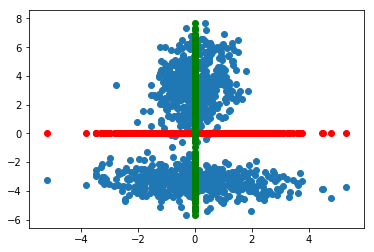

In [71]:
#ANSQ2
d_shift = d_acp-d_acp_mean
print(d_shift)
plt.axis(aspect='equal')
plt.scatter(*d_shift.T)

d_shift_mean = np.mean(d_shift, axis=0)
plt.scatter(*d_shift_mean)
plt.scatter(d_shift[:,0], np.zeros(np.shape(d_shift[:,0])), c='r')
plt.scatter(np.zeros(np.shape(d_shift[:,1])), d_shift[:,1], c='g')

error_shift = [np.sqrt(np.sum([x**2 for x in l])) for l in reversed(d_shift.T)]
print(error_shift)
print("""The total error when projecting on each eigen vector after removing the bias is: {}
We can see that the second eigen vector (which has the largest eigen value) has now a lower error.
It's because we have remove the bias in the data when shifting it.""".format(error_shift))




#/ANSQ2

In [115]:
print("it's impossible to find a threshold that classifies correctly the data using the red projection only.")
threshold = -1.9
prediction = [0. if x[0] >= threshold else 1. for x in d_shift]

accuracy = len(list(filter(lambda x: x[0]==x[1], zip(prediction,l))))/len(prediction)
print('\tThe accuracy we get when classifying with the shifted data is: {}'.format(accuracy))


print('We can easily find a threshold that classifies the data using the green projected datapoints:')
threshold = -1
prediction = [0. if x[1] >= threshold else 1. for x in d_shift]

accuracy = len(list(filter(lambda x: x[0]==x[1], zip(prediction,l))))/len(prediction)
print('\tThe accuracy we get when classifying with the shifted data is: {}'.format(accuracy))


threshold = -1 + d_acp_mean[1]
prediction = [0. if x[1] >= threshold else 1. for x in d_acp]

accuracy = len(list(filter(lambda x: x[0]==x[1], zip(prediction,l))))/len(prediction)
print('\tThe accuracy we get when classifying with the acp (not shifted) data is: {}'.format(accuracy))



it's impossible to find a threshold that classifies correctly the data using the red projection only.
	The accuracy we get when classifying with the shifted data is: 0.556
We can easily find a threshold that classifies the data using the green projected datapoints:
	The accuracy we get when classifying with the shifted data is: 1.0
	The accuracy we get when classifying with the acp (not shifted) data is: 1.0
